In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import json
import matplotlib.pyplot as plt


sns.set_theme(style='whitegrid')
plt.style.use('default')

In [64]:
# Load full dataset

with open("../dataset/rush_no_wall_1000_balanced.json", "r", encoding="utf-8") as f:
    full_dataset = json.load(f)



In [65]:
# Load human survey results
humans = pd.read_csv("../data/survey/results.csv")

humans["puzzle_id"] = (
    humans["puzzle_id"]
    .str.replace("dataset-", "", regex=False)
    .astype(int)
)

# Add puzzle level information to humans DataFrame
id_to_level = {p["name"]: p["min_num_moves"] for p in full_dataset}
humans["level"] = humans["puzzle_id"].map(id_to_level)

print(humans.head())

  participant_email  puzzle_id  max_moves  player_moves  time_taken_seconds  \
0                 *          1          2             3                   7   
1                 *         14          3             3                   6   
2                 *          1          2             2                   7   
3                 *         14          3             3                   8   
4                 *         52          4             4                   4   

   level  
0      2  
1      3  
2      2  
3      3  
4      4  


In [3]:
# Load 3-shot results
with open("../results/results_3shot_20251212_191639.json", "r", encoding="utf-8") as f:
    data = json.load(f)

few_shots = pd.DataFrame(data)

few_shots.head()

,idx,level,valid,label,time,ttc,prompt,thoughts,answer
0,24,3,True,OPTIMAL,23.883954,2921,You have to solve the following 6x6 Rush Hour ...,**Initial Assessment and Problem Decomposition...,"[{'name': 'B', 'direction': 'left', 'distance'..."
1,27,3,False,INVALID_MOVE,24.873258,3099,You have to solve the following 6x6 Rush Hour ...,"**Alright, here's the breakdown of my thought ...","[{'name': 'D', 'direction': 'down', 'distance'..."
2,21,3,True,OPTIMAL,26.594612,3341,You have to solve the following 6x6 Rush Hour ...,"**Alright, here's the breakdown of my thought ...","[{'name': 'C', 'direction': 'left', 'distance'..."
3,14,3,True,OPTIMAL,35.590583,4977,You have to solve the following 6x6 Rush Hour ...,"**The Rush Hour Solution**\n\nOkay, so I'm loo...","[{'name': 'B', 'direction': 'left', 'distance'..."
4,15,3,True,OPTIMAL,38.530205,4951,You have to solve the following 6x6 Rush Hour ...,**Initial Assessment and Problem Decomposition...,"[{'name': 'B', 'direction': 'right', 'distance..."


In [4]:
# Load 0-shot results
with open("../results/results_0shot_20251212_063302.json", "r", encoding="utf-8") as f:
    data = json.load(f)

zero_shot = pd.DataFrame(data)

zero_shot

,idx,level,valid,label,time,ttc,prompt,thoughts,answer
0,8,3,True,OPTIMAL,16.839130,1703,You have to solve the following 6x6 Rush Hour ...,"**Rush Hour Solution Process**\n\nOkay, so the...","[{'name': 'B', 'direction': 'left', 'distance'..."
1,7,3,True,OPTIMAL,27.486174,3136,You have to solve the following 6x6 Rush Hour ...,"**Okay, here's my thought process:** The user ...","[{'name': 'B', 'direction': 'left', 'distance'..."
2,0,3,True,OPTIMAL,32.333857,3861,You have to solve the following 6x6 Rush Hour ...,**Analysis and Solution for 6x6 Rush Hour Puzz...,"[{'name': 'B', 'direction': 'left', 'distance'..."
3,1,3,True,OPTIMAL,34.375154,4368,You have to solve the following 6x6 Rush Hour ...,"**Final Rush Hour Puzzle Solution**\n\nOkay, h...","[{'name': 'B', 'direction': 'left', 'distance'..."
4,9,3,True,OPTIMAL,36.560226,4243,You have to solve the following 6x6 Rush Hour ...,**My Approach to the Rush Hour Puzzle**\n\nOka...,"[{'name': 'C', 'direction': 'left', 'distance'..."
...,...,...,...,...,...,...,...,...,...
175,56,8,True,OPTIMAL,124.871982,16411,You have to solve the following 6x6 Rush Hour ...,"**The Rush Hour Solution**\n\nOkay, here's my ...","[{'name': 'F', 'direction': 'down', 'distance'..."
176,55,8,True,NOT_OPTIMAL,134.708747,17925,You have to solve the following 6x6 Rush Hour ...,**My Solution for the Rush Hour Puzzle**\n\nOk...,"[{'name': 'D', 'direction': 'left', 'distance'..."
177,59,8,False,INVALID_MOVE,183.393156,23716,You have to solve the following 6x6 Rush Hour ...,"**Okay, here's my breakdown of this Rush Hour ...","[{'name': 'D', 'direction': 'right', 'distance..."
178,52,8,False,INVALID_MOVE,188.375881,23644,You have to solve the following 6x6 Rush Hour ...,**A Rush Hour Puzzle and My Deep Dive into Its...,"[{'name': 'B', 'direction': 'left', 'distance'..."


In [5]:
# Load augmented results
with open("../results/results_0shot_20251213_174024.json", "r", encoding="utf-8") as f:
    data = json.load(f)

augmented = pd.DataFrame(data)

augmented

,idx,level,valid,label,time,ttc,prompt,thoughts,answer
0,28,3,True,NOT_OPTIMAL,26.823152,2581,You are solving a Rush Hour puzzle on a 6x6 gr...,**Rush Hour Puzzle Solution: Thoughts and Proc...,"```python\n{\n ""steps"": [\n {\n ..."
1,21,3,True,NOT_OPTIMAL,44.304009,5470,You are solving a Rush Hour puzzle on a 6x6 gr...,**Initial Assessment and Problem Breakdown**\n...,"```python\n{\n""steps"": [\n{\n""move"": {""name"": ..."
2,30,3,True,NOT_OPTIMAL,44.311122,5534,You are solving a Rush Hour puzzle on a 6x6 gr...,**Solution Generation for Rush Hour Puzzle**\n...,"```python\n{\n ""steps"": [\n {\n ..."
3,25,3,True,NOT_OPTIMAL,45.289213,5509,You are solving a Rush Hour puzzle on a 6x6 gr...,"**Solving the Rush Hour Puzzle**\n\nOkay, here...","```python\n{\n ""steps"": [\n {\n ..."
4,15,3,True,OPTIMAL,47.648533,6202,You are solving a Rush Hour puzzle on a 6x6 gr...,**Solution Generation for Rush Hour Puzzle**\n...,"```python\n{\n ""steps"": [\n {\n ..."
...,...,...,...,...,...,...,...,...,...
175,216,11,False,INVALID_MOVE,142.364521,20693,You are solving a Rush Hour puzzle on a 6x6 gr...,"**Solving the Rush Hour Puzzle**\n\nOkay, here...","```python\n{\n ""steps"": [\n {\n ..."
176,222,11,False,INVALID_MOVE,158.903576,21175,You are solving a Rush Hour puzzle on a 6x6 gr...,**Initial Thoughts: Rush Hour Puzzle - Let's G...,"```python\n{\n ""steps"": [\n {\n ..."
177,209,11,False,INVALID_MOVE,159.173809,22026,You are solving a Rush Hour puzzle on a 6x6 gr...,**Final Solution: 6-Step Rush Hour Puzzle**\n\...,"```python\n{\n ""steps"": [\n {\n ..."
178,224,11,False,INVALID_MOVE,161.939365,22060,You are solving a Rush Hour puzzle on a 6x6 gr...,"**The Rush Hour Puzzle Solution**\n\nOkay, her...","```python\n{\n ""steps"": [\n {\n ..."


In [69]:
levels = list(range(3, 21))

df_augmented = augmented[augmented["level"].between(3, 20)]
df_0sp = zero_shot[zero_shot["level"].between(3, 20)]
df_fsp = few_shots[few_shots["level"].between(3, 20)]
df_humans = humans[humans["level"].between(3, 20)]


In [70]:
# Compute success rate curves

total_participants = 76
nbr_puzzles_per_level = 10

human_counts = df_humans.groupby("level").size()
human_counts = human_counts.reindex(levels, fill_value=0)
sr_humans = human_counts / total_participants

sr_counts = df_0sp[df_0sp["valid"]].groupby("level").size()
sr_counts = sr_counts.reindex(levels, fill_value=0)
sr_0sp = sr_counts / nbr_puzzles_per_level

fsp_counts = df_fsp[df_fsp["valid"]].groupby("level").size()
fsp_counts = fsp_counts.reindex(levels, fill_value=0)
sr_fsp = fsp_counts / nbr_puzzles_per_level

augmented_counts = df_augmented[df_augmented["valid"]].groupby("level").size()
augmented_counts = augmented_counts.reindex(levels, fill_value=0)
sr_augmented = augmented_counts / nbr_puzzles_per_level

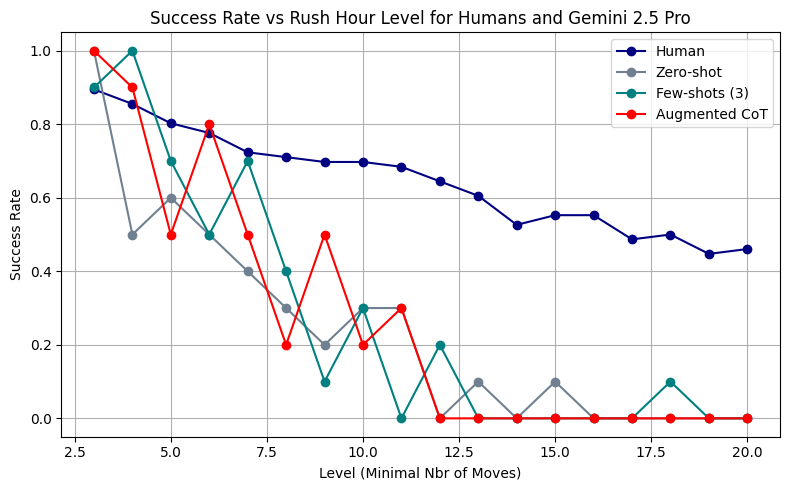

In [71]:
plt.figure(figsize=(8, 5))
plt.plot(levels, sr_humans, marker="o", color='navy', label="Human")
plt.plot(levels, sr_0sp, marker="o", color='slategray', label="Zero-shot")
plt.plot(levels, sr_fsp, marker="o", color='teal', label="Few-shots (3)")
plt.plot(levels, sr_augmented, marker="o", color='red', label="Augmented CoT")

plt.xlabel("Level (Minimal Nbr of Moves)")
plt.ylabel("Success Rate")
plt.title("Success Rate vs Rush Hour Level for Humans and Gemini 2.5 Pro")
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


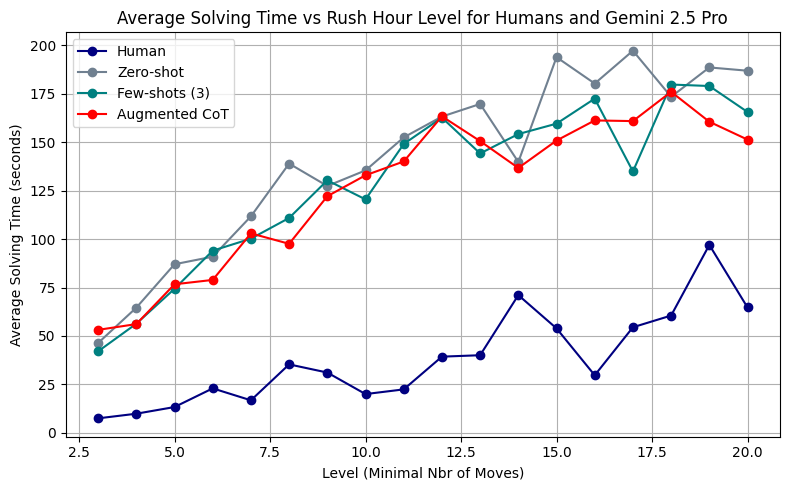

In [72]:
# Compute solving time curves
avg_time_humans = (
    df_humans.groupby("level")["time_taken_seconds"]
    .mean()
    .reindex(levels, fill_value=0)
)
avg_time_0sp = (
    df_0sp
    .groupby("level")["time"]
    .mean()
    .reindex(levels, fill_value=0)
)
avg_time_fsp = (
    df_fsp
    .groupby("level")["time"]
    .mean()
    .reindex(levels, fill_value=0)
)   

avg_time_augmented = (
    df_augmented
    .groupby("level")["time"]
    .mean()
    .reindex(levels, fill_value=0)
)   

plt.figure(figsize=(8, 5))
plt.plot(levels, avg_time_humans, marker="o", color='navy', label="Human")
plt.plot(levels, avg_time_0sp, marker="o", color='slategray', label="Zero-shot")
plt.plot(levels, avg_time_fsp, marker="o", color='teal', label="Few-shots (3)") 
plt.plot(levels, avg_time_augmented, marker="o", color='red', label="Augmented CoT") 
plt.xlabel("Level (Minimal Nbr of Moves)")
plt.ylabel("Average Solving Time (seconds)")
plt.title("Average Solving Time vs Rush Hour Level for Humans and Gemini 2.5 Pro")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
# Means and std solving time for all levels combined

print(f"Solving time for humans: mean {df_humans["time_taken_seconds"].mean()} std {df_humans["time_taken_seconds"].std()}")
print(f"Solving time for LLM with 0sp: mean {df_0sp["time"].mean()} std {df_0sp["time"].std()}")
print(f"Solving time for LLM with fsp: mean {df_fsp["time"].mean()} std {df_fsp["time"].std()}")
print(f"Solving time for LLM with augmented CoT: mean {df_augmented["time"].mean()} std {df_augmented["time"].std()}")


Solving time for humans: mean 33.98867497168743 std 39.10265991192783
Solving time for LLM with 0sp: mean 141.5757801440027 std 58.34486971597092
Solving time for LLM with fsp: mean 129.4700611922476 std 53.022464403214904
Solving time for LLM with augmented CoT: mean 126.23756018082301 std 51.83055369707803


In [74]:
# Means and std success rate for all levels combined

print(f"Success rate for humans: mean {sr_humans.mean()} std {sr_humans.std()}")
print(f"Success rate for LLM with 0sp: mean {sr_0sp.mean()} std {sr_0sp.std()}")
print(f"Success rate for LLM with fsp: mean {sr_fsp.mean()} std {sr_fsp.std()}")
print(f"Success rate for LLM with fsp: mean {sr_augmented.mean()} std {sr_augmented.std()}")

Success rate for humans: mean 0.64546783625731 std 0.13677601867993575
Success rate for LLM with 0sp: mean 0.23888888888888887 std 0.2789452589959899
Success rate for LLM with fsp: mean 0.27222222222222225 std 0.3443759155949063
Success rate for LLM with fsp: mean 0.27222222222222225 std 0.346079820027209
